# Part 1: Predicting employee salary with linear regression

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score

## Data Preprocessing and Analysis

In [197]:
# Reads the .txt file and separates by commas
sjs = pd.read_table('Salary&JobSatisfaction Dataset.txt', delimiter=',')
# Makes a dataframe of the data
sjs_df = pd.DataFrame(sjs)
# Display the DataFrame
sjs_df

,Years_of_Experience,Education_Level,Job_Complexity,Work_Hours_Per_Week,Company_Size,Salary (Euros),Buyer_Income (Euros),Job_Satisfaction
0,38,2,5,45,Medium,130419.0,117125.09,Yes
1,28,1,5,59,Medium,97704.0,88058.75,Yes
2,14,2,9,41,Medium,95088.0,92752.97,No
3,7,3,10,32,Medium,94073.0,101334.01,No
4,20,3,2,40,Medium,95626.0,107042.73,No
...,...,...,...,...,...,...,...,...
995,7,2,6,58,Large,73531.0,83712.49,No
996,27,1,9,55,Large,121667.0,119654.11,No
997,30,1,8,50,Medium,118038.0,117650.19,Yes
998,8,3,7,43,Large,93217.0,89068.37,Yes


### Since we are doing linear regression I check every feature to see if there is a linear relationship to salary, this will help us decide if a feature will be useful to train our model or not. For education level, job complexity and company size I use boxplots to better visualize the data as they are discrete values which made it hard to see if there was a linear relationship to salary.

Missing Values:
 Years_of_Experience     0
Education_Level         0
Job_Complexity          0
Work_Hours_Per_Week     0
Company_Size            0
Salary (Euros)          0
Buyer_Income (Euros)    0
Job_Satisfaction        0
dtype: int64


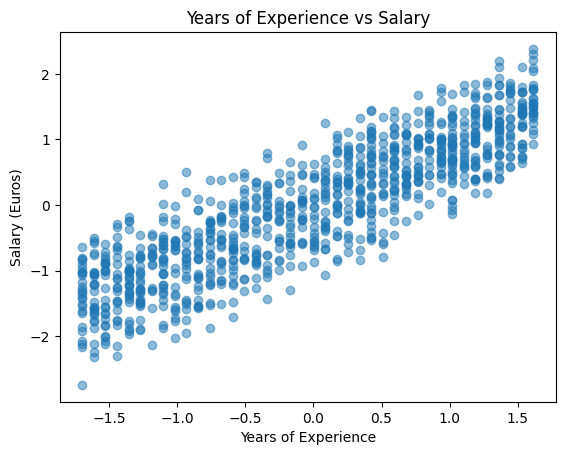

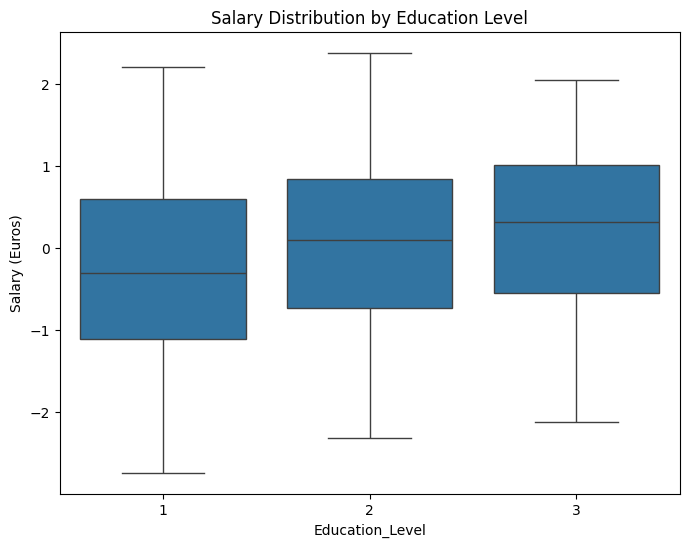

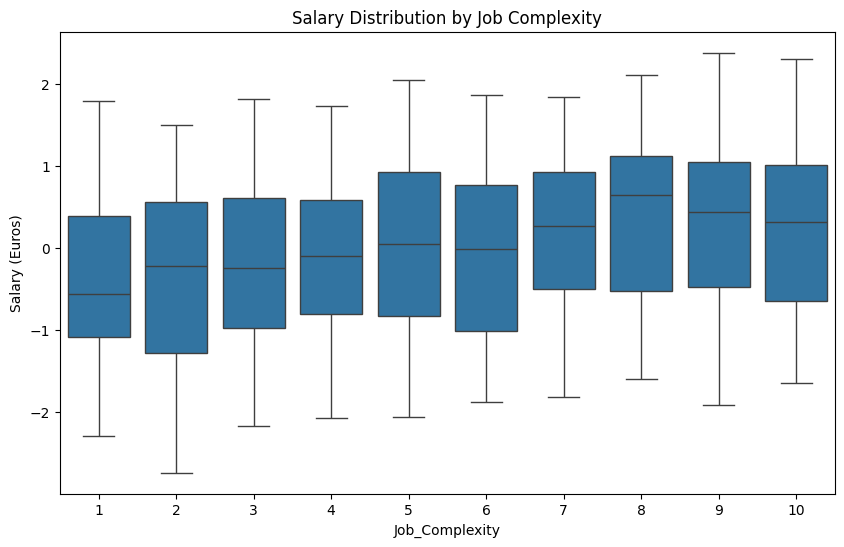

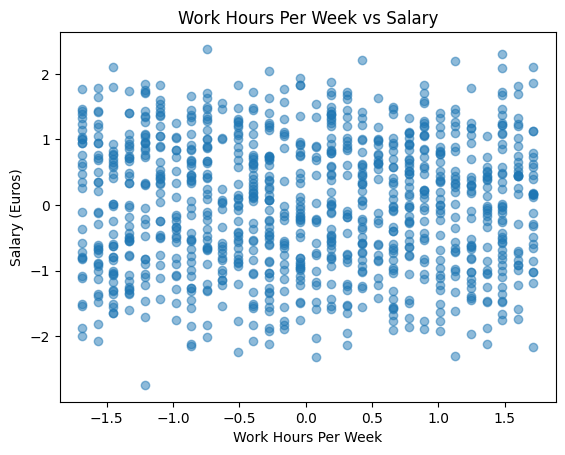

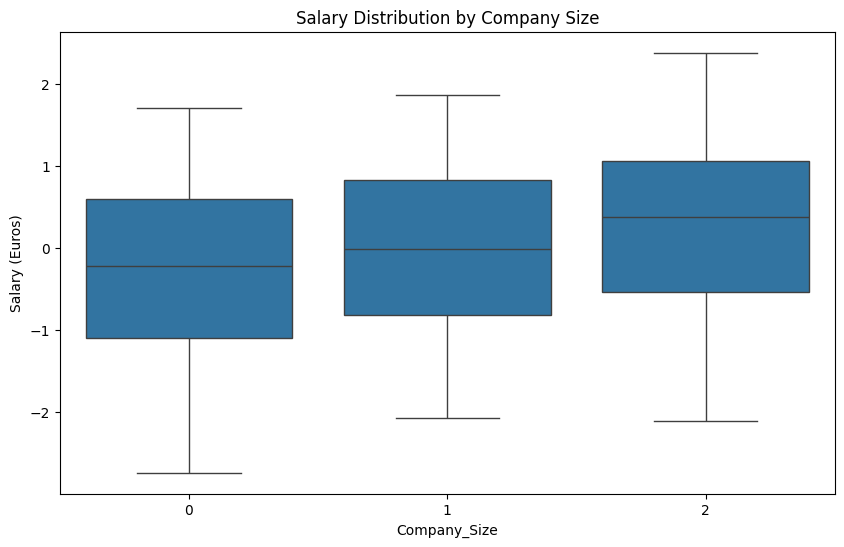

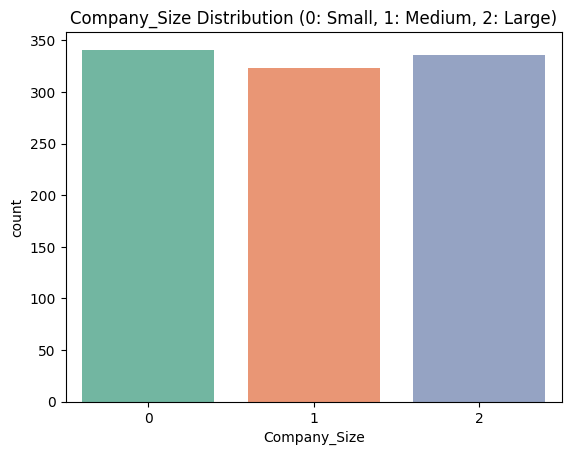

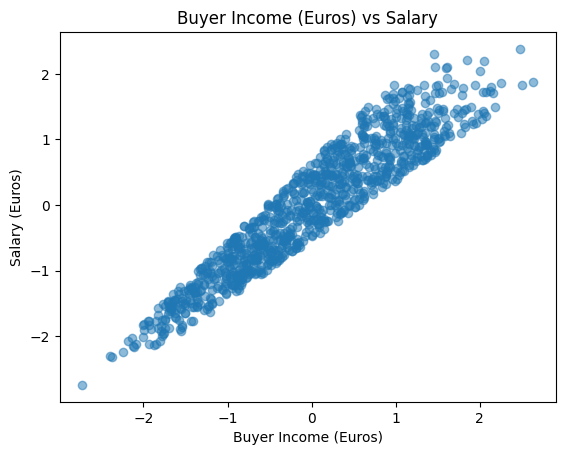

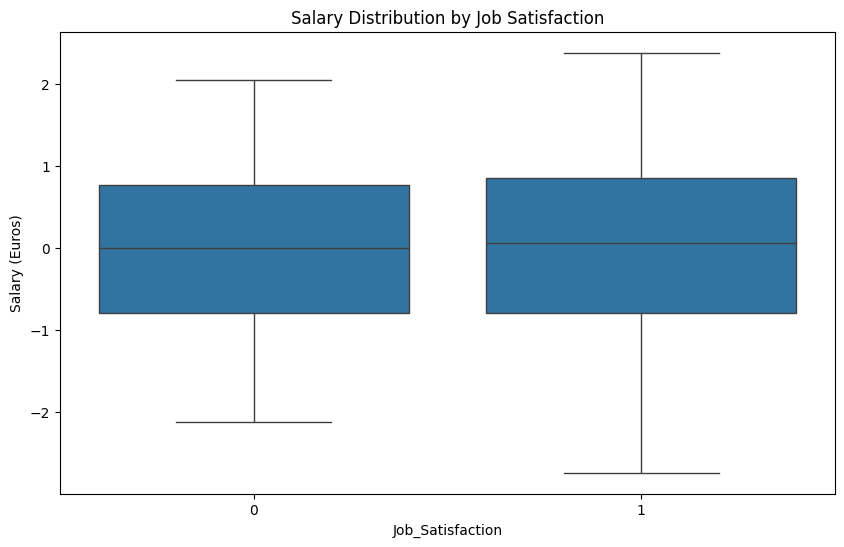

In [229]:
# Checks for missing values in the dataset
print("Missing Values:\n", sjs.isnull().sum())

# Scatter plot for Years_of_Experience
plt.scatter(sjs_df['Years_of_Experience'], sjs_df['Salary (Euros)'], alpha=0.5)
plt.xlabel('Years of Experience')
plt.ylabel('Salary (Euros)')
plt.title('Years of Experience vs Salary')
plt.show()

# Box plot for Education_Level
plt.figure(figsize=(8, 6))
sns.boxplot(x='Education_Level', y='Salary (Euros)', data=sjs_df)
plt.title('Salary Distribution by Education Level')
plt.show()

# Box plot for Job_Complexity
plt.figure(figsize=(10, 6))
sns.boxplot(x='Job_Complexity', y='Salary (Euros)', data=sjs_df)
plt.title('Salary Distribution by Job Complexity')
plt.show()

# Scatter plot for Work_Hours_Per_Week
plt.scatter(sjs_df['Work_Hours_Per_Week'], sjs_df['Salary (Euros)'], alpha=0.5)
plt.xlabel('Work Hours Per Week')
plt.ylabel('Salary (Euros)')
plt.title('Work Hours Per Week vs Salary')
plt.show()

# Box plot for Company_Size
plt.figure(figsize=(10, 6))
sns.boxplot(x='Company_Size', y='Salary (Euros)', data=sjs_df)
plt.title('Salary Distribution by Company Size')
plt.show()

sns.countplot(x='Company_Size', data=sjs_df, hue='Company_Size', palette='Set2', legend=False)
plt.title('Company_Size Distribution (0: Small, 1: Medium, 2: Large)')
plt.show()

# Scatter plot for Buyer_Income (Euros)
plt.scatter(sjs_df['Buyer_Income (Euros)'], sjs_df['Salary (Euros)'], alpha=0.5)
plt.xlabel('Buyer Income (Euros)')
plt.ylabel('Salary (Euros)')
plt.title('Buyer Income (Euros) vs Salary')
plt.show()

# Box plot for Job_Satisfaction
plt.figure(figsize=(10, 6))
sns.boxplot(x='Job_Satisfaction', y='Salary (Euros)', data=sjs_df)
plt.title('Salary Distribution by Job Satisfaction')
plt.show()

In [201]:
# Define the numerical features
num_features = ['Years_of_Experience', 'Work_Hours_Per_Week', 'Buyer_Income (Euros)', 'Salary (Euros)']
# Scale the numerical features
scaler = StandardScaler()
sjs_df[num_features] = scaler.fit_transform(sjs_df[num_features])
# Encode the categorical features using map() 
company_size_mapping = {'Small': 0, 'Medium': 1, 'Large': 2}
sjs_df['Company_Size'] = sjs_df['Company_Size'].map(company_size_mapping)
job_satisfaction_mapping = {'No': 0, 'Yes': 1}
sjs_df['Job_Satisfaction'] = sjs_df['Job_Satisfaction'].map(job_satisfaction_mapping)
# Display the DataFrame
#pd.set_option("display.max_rows", 0)
sjs_df

,Years_of_Experience,Education_Level,Job_Complexity,Work_Hours_Per_Week,Company_Size,Salary (Euros),Buyer_Income (Euros),Job_Satisfaction
0,1.529535,2,5,0.074861,1,1.545109,0.965795,1
1,0.680218,1,5,1.715003,1,0.171925,-0.206690,1
2,-0.508826,2,9,-0.393751,1,0.062121,-0.017334,0
3,-1.103348,3,10,-1.448128,1,0.019517,0.328810,0
4,0.000764,3,2,-0.510904,1,0.084703,0.559090,0
...,...,...,...,...,...,...,...,...
995,-1.103348,2,6,1.597850,2,-0.842715,-0.382011,0
996,0.595286,1,9,1.246391,2,1.177751,1.067811,0
997,0.850082,1,8,0.660626,1,1.025427,0.986976,1
998,-1.018416,3,7,-0.159445,2,-0.016413,-0.165964,1


## Split the Dataset
### Here I drop both the target and work hours per week as we found it didn't have a linear relationship to salary.

In [203]:
X = sjs_df.drop(columns=['Salary (Euros)', 'Work_Hours_Per_Week'])
y = sjs_df['Salary (Euros)']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print("\nShapes After Splitting:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

# Saves the preprocessed dataset to a csv file
X_train.to_csv('X_train_sjs.csv', index=False)
X_test.to_csv('X_test_sjs.csv', index=False)
y_train.to_csv('y_train_sjs.csv', index=False)
y_test.to_csv('y_test_sjs.csv', index=False)
print("\nPreprocessing Complete! Files saved.")


Shapes After Splitting:
X_train: (900, 6), X_test: (100, 6), y_train: (900,), y_test: (100,)

Preprocessing Complete! Files saved.


## Train the Model

In [205]:
# Initialize the model
sjs_model = LinearRegression()

# Train the model on the training data
sjs_model.fit(X_train, y_train)

LinearRegression()

## Evaluations

In [207]:
# Predictions
y_test_pred = sjs_model.predict(X_test)

# Calculate model performance
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

print("\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared: {r2:.2f}")


Model Performance:
Mean Absolute Error (MAE): 0.11
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.14
R-squared: 0.98


### As we can see the R-squared shows the model does a great job of explaining the variance in the target (salary).

# Part 2: Classify job satisfaction using logistic regression

## Data Preprocessing and Analysis
### The data was preprocessed from part 1 and in this case we didn't have to process it further.

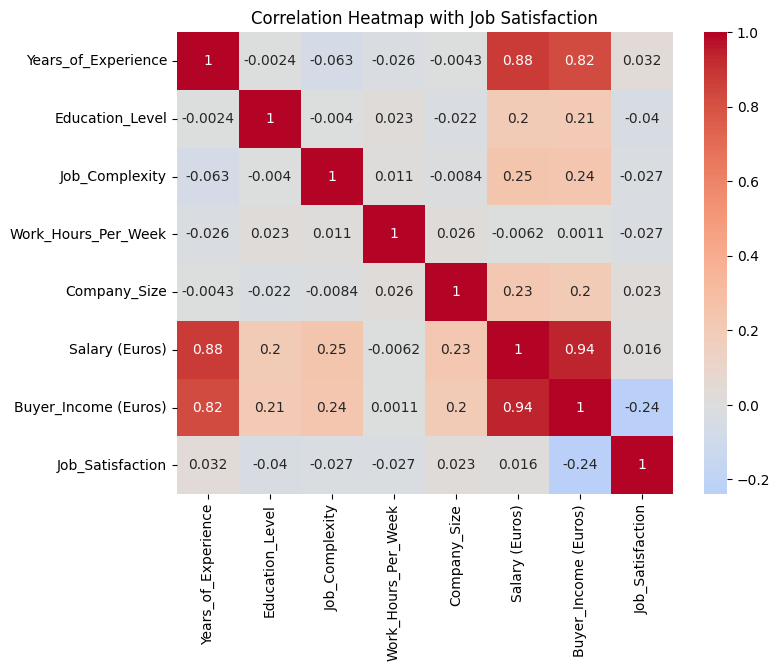

In [216]:
# Compute correlation matrix
correlation_matrix = sjs_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap with Job Satisfaction')
plt.show()

## Split the Dataset
### I don't drop any feature other than the target here since that produced the best results for my model.

In [219]:
X = sjs_df.drop(columns=['Job_Satisfaction'])
y = sjs_df['Job_Satisfaction']

# Split the data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.1, random_state=42)
print("\nShapes After Splitting:")
print(f"X_train: {X_train2.shape}, X_test: {X_test2.shape}, y_train: {y_train2.shape}, y_test: {y_test2.shape}")

# Saves the preprocessed dataset to a csv file
X_train2.to_csv('X_train_sjs2.csv', index=False)
X_test2.to_csv('X_test_sjs2.csv', index=False)
y_train2.to_csv('y_train_sjs2.csv', index=False)
y_test2.to_csv('y_test_sjs2.csv', index=False)
print("\nPreprocessing Complete! Files saved.")


Shapes After Splitting:
X_train: (900, 7), X_test: (100, 7), y_train: (900,), y_test: (100,)

Preprocessing Complete! Files saved.


## Train the Model

In [222]:
# Initialize the model
sjs_model2 = LogisticRegression(class_weight='balanced')
# Train the model on the training data
sjs_model2.fit(X_train2, y_train2)

LogisticRegression(class_weight='balanced')

## Evaluations


Model Performance:
Classfication Report: 
              precision    recall  f1-score   support

           0       0.93      0.79      0.85        52
           1       0.80      0.94      0.87        48

    accuracy                           0.86       100
   macro avg       0.87      0.86      0.86       100
weighted avg       0.87      0.86      0.86       100

Training Confusion Matrix: 
[[371  49]
 [ 67 413]]
Testing Confusion Matrix: 
[[41 11]
 [ 3 45]]
Training Accuracy: 87.11%
Testing Accuracy: 86.00%
Cross-Validation Accuracy: 0.87 ± 0.02

Feature Importance:
                Feature  Coefficient
5        Salary (Euros)     5.396716
0   Years_of_Experience     1.037644
1       Education_Level     0.271349
4          Company_Size     0.251497
2        Job_Complexity     0.114141
3   Work_Hours_Per_Week    -0.057836
6  Buyer_Income (Euros)    -6.861594


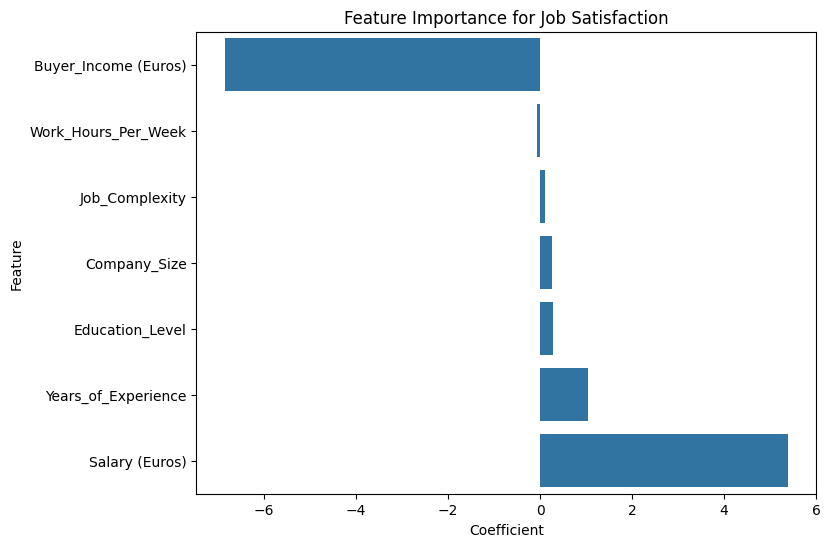

In [225]:
# Predictions
y_train_pred2 = sjs_model2.predict(X_train2)
y_test_pred2 = sjs_model2.predict(X_test2)

# Calculate model performance
classification_rep = classification_report(y_test2, y_test_pred2)
train_confusion_matrix = confusion_matrix(y_train2, y_train_pred2)
test_confusion_matrix = confusion_matrix(y_test2, y_test_pred2)
train_accuracy = accuracy_score(y_train2, y_train_pred2)
test_accuracy = accuracy_score(y_test2, y_test_pred2)
cv_scores = cross_val_score(sjs_model2, X_train2, y_train2, cv=5)

print("\nModel Performance:")
print(f"Classfication Report: \n{classification_rep:}")
print(f"Training Confusion Matrix: \n{train_confusion_matrix}")
print(f"Testing Confusion Matrix: \n{test_confusion_matrix}")
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X_train2.columns,
    'Coefficient': sjs_model2.coef_[0]
})
print("\nFeature Importance:")
print(feature_importance.sort_values(by='Coefficient', ascending=False))

# Plot Feature Importance
plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance.sort_values(by='Coefficient'))
plt.title('Feature Importance for Job Satisfaction')
plt.show()

### The model hits an accuracy between 86-91% which is very decent for this dataset as the data wasn't super meaningful to predict job satisfaction.